In [87]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [108]:
df = pd.DataFrame(digits.data, columns=digits.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


<Figure size 640x480 with 0 Axes>

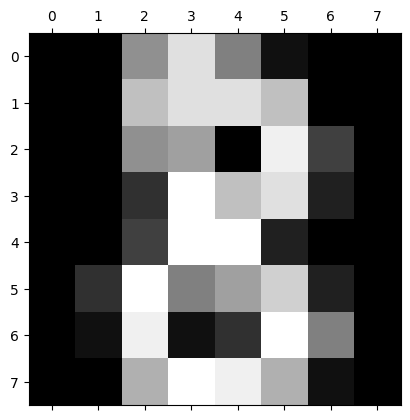

In [88]:
# representing the pixel matrix in form of an image
plt.gray()
plt.matshow(digits.data[8].reshape(8, -1))

In [121]:
# independent and dependent features
x = digits.data
y = digits.target
# spliting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size=0.33)

In [122]:
# training the different models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [123]:
from sklearn.model_selection import cross_val_score
log_scores = cross_val_score(estimator=LogisticRegression(max_iter=100), X=x_train, y=y_train, cv=5)
randomF_scores = cross_val_score(estimator=RandomForestClassifier(), X=x_train, y=y_train, cv=5)
svm_scores = cross_val_score(estimator=SVC(), X=x_train, y=y_train, cv=5)
print("Logistic scores: ",log_scores)
print("Random forest scores: ",randomF_scores)
print("SVC scores: ",svm_scores)

d:\Coding\Personal\Learning\ML\Practice_Scikit\ml\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Coding\Personal\Learning\ML\Practice_Scikit\ml\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.or

Logistic scores:  [0.95435685 0.98340249 0.97095436 0.96666667 0.95833333]
Random forest scores:  [0.95850622 0.97925311 0.98340249 0.96666667 0.95833333]
SVC scores:  [0.97925311 0.99170124 0.99585062 0.98333333 0.98333333]


In [124]:
param_grid = { 
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 0.01, 0.1, 1],    
    'degree': [3]                  
}

In [125]:
# SVC yields better, so using hyper parameter tuning on it
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=SVC(), param_grid=param_grid, scoring='accuracy', cv=5)
grid.fit(x_train, y_train)
grid.best_score_

np.float64(0.9916839557399723)

In [126]:
y_pred = grid.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, f1_score
print(f"accuracy: {accuracy_score(y_test, y_pred)} \n")
print(f"report: {classification_report(y_test, y_pred)}")

accuracy: 0.9848484848484849 

report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       0.98      0.98      0.98        60
           2       0.98      1.00      0.99        54
           3       1.00      0.96      0.98        69
           4       1.00      1.00      1.00        54
           5       0.98      0.97      0.98        63
           6       0.98      1.00      0.99        63
           7       0.97      1.00      0.98        57
           8       0.96      0.98      0.97        56
           9       0.98      0.97      0.98        63

    accuracy                           0.98       594
   macro avg       0.98      0.99      0.99       594
weighted avg       0.99      0.98      0.98       594

